In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# built-in library
import itertools
import json
import re
from typing import Union, Optional, Sequence

#pandas setting
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# black code formatter
%load_ext nb_black

# auto reload import
%load_ext autoreload
%autoreload 2


<IPython.core.display.Javascript object>

In [2]:
def count_plot(
    *,
    df: pd.DataFrame,
    columns: list,
    nrows: int,
    ncols: int,
    figsize: tuple = (17, 10),
    hue: str = None,
    hspace: float = 0.3,
    wspace: float = 0.2,
    title_size: int = 15,
    xlabel_size: int = 15,
    ylabel_size: int = 15,
    rotation: int = None,
    x_labelsize: int = 12,
    color: str = "#6e917f",
) -> "Plot":
    """This fuction returns multiple bar chart simultaneously
    ==========================================================
    -> df: The dataframe to be used
    -> data: list of columns to be use
    -> nrows: number of row
    -> n_cols: number of columns
       the product of the number of row and columns should not be less than the size of the data listed
    -> figzise: The size of the figures, width and height as tuple, by default is 17 width, 10 height
    -> hue: Additional information to the chart, it is like a legend, it is None by default
    -> hspace: height space, helps between the rows, by  0.3 by default
    -> wspace: width space, helps between the columns, by  0.1 by default
    -> xlabel_size: the size of the x label, 15 by default
    -> ylabel_size: the size of the y label, 15 by default
    -> rotation: the number of degrees to be rotated for x label, 0 by default
    -> labelsize: size of the label when it is set to rotate

    """

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    for idx, var in enumerate(columns):
        if nrows > 1:
            ax = axs[
                (idx // ncols), (idx % ncols)
            ]  # calculating and finding the axis and  then store it
        else:
            ax = axs[idx]

        if hue == None:
            sns.countplot(data=df, x=var, ax=ax, color=color)
            ax.set_title(f"Distribution of {var!r}", size=title_size)
            ax.set_xlabel(var, size=xlabel_size)
            ax.set_ylabel("count", size=ylabel_size)
            plt.subplots_adjust(hspace=hspace, wspace=wspace)
            if rotation != None:
                ax.tick_params(axis="x", rotation=rotation, labelsize=x_labelsize)

        else:
            sns.countplot(data=df, x=var, ax=ax, hue=hue)
            ax.set_title(f"Distribution of {var!r} over {hue!r}", size=title_size)
            ax.set_xlabel(var, size=xlabel_size)
            ax.set_ylabel("count", size=ylabel_size)
            plt.subplots_adjust(hspace=hspace, wspace=wspace)
            ax.legend()  # the hue already act as lagend but include the lagend variable, this help me remive the variable
            if rotation != None:
                ax.tick_params(axis="x", rotation=rotation, labelsize=x_labelsize)

<IPython.core.display.Javascript object>

In [3]:
def bar_plot(
    *,
    df: pd.DataFrame,
    y_columns: list,
    x_column: str,
    nrows: int,
    ncols: int,
    figsize: tuple = (17, 10),
    hue: str = None,
    hspace: float = 0.3,
    wspace: float = 0.2,
    title_size: int = 15,
    xlabel_size: int = 15,
    ylabel_size: int = 15,
    rotation: int = None,
    x_labelsize: int = 12,
    color: str = "#6e917f",
) -> "Plot":
    """This fuction returns multiple bar chart simultaneously
    ==========================================================
    Parameters
    -> df: The dataframe to be used
    -> data: list of columns to be use
    -> nrows: number of row
    -> n_cols: number of columns
       the product of the number of row and columns should not be less than the size of the data listed
    -> figzise: The size of the figures, width and height as tuple, by default is 17 width, 10 height
    -> hue: Additional information to the chart, it is like a legend, it is None by default
    -> hspace: height space, helps between the rows, by  0.3 by default
    -> wspace: width space, helps between the columns, by  0.1 by default
    -> xlabel_size: the size of the x label, 15 by default
    -> ylabel_size: the size of the y label, 15 by default
    -> rotation: the number of degrees to be rotated for x label, 0 by default
    -> labelsize: size of the label when it is set to rotate

    """

    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    x_col = x_column
    for idx, var in enumerate(y_columns):
        if nrows > 1:
            ax = axs[
                (idx // ncols), (idx % ncols)
            ]  # calculating and finding the axis and  then store it
        else:
            ax = axs[idx]

        if hue == None:
            sns.barplot(data=df, x=x_col, y=var, ax=ax, color=color)
            ax.set_title(
                f"Relationship between {x_column!r}  & {var!r}",
                size=title_size,
            )
            ax.set_xlabel(var, size=xlabel_size)
            ax.set_ylabel("count", size=ylabel_size)
            plt.subplots_adjust(hspace=hspace, wspace=wspace)
            if rotation != None:
                ax.tick_params(axis="x", rotation=rotation, labelsize=x_labelsize)

        else:
            sns.barplot(data=df, x=x_col, y=var, ax=ax, hue=hue)
            ax.set_title(
                f"Relationship between {x_column!r} & {var!r}", size=title_size
            )
            ax.set_xlabel(var, size=xlabel_size)
            ax.set_ylabel("count", size=ylabel_size)
            plt.subplots_adjust(hspace=hspace, wspace=wspace)
            ax.legend()  # the hue already act as lagend but include the lagend variable, this help me remive the variable
            if rotation != None:
                ax.tick_params(axis="x", rotation=rotation, labelsize=x_labelsize)

<IPython.core.display.Javascript object>

In [4]:
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_1536\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<IPython.core.display.Javascript object>

## EDA AND MODEL OF STUDENT PERFORMANCE DATASET


In [5]:
# load the dataset
data = pd.read_csv("data/StudentsPerformance.csv")
df = data.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# shape of the data
df.shape

(1000, 8)

<IPython.core.display.Javascript object>

In [8]:
# checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<IPython.core.display.Javascript object>

#### No missing values in the data

In [9]:
# description of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<IPython.core.display.Javascript object>

In [10]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<IPython.core.display.Javascript object>

In [11]:
# adding final grade(result), by making it by 100
scores = ["math score", "reading score", "writing score"]
df["result"] = round(df[scores].mean(axis=1), 2)
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67


<IPython.core.display.Javascript object>

In [12]:
# let get the numerical and categorical variables
num_data, cat_data = df.select_dtypes(exclude="O"), df.select_dtypes(include="O")

<IPython.core.display.Javascript object>

In [13]:
num_data.head(3)

,math score,reading score,writing score,result
0,72,72,74,72.67
1,69,90,88,82.33
2,90,95,93,92.67


<IPython.core.display.Javascript object>

#### The numerical data

In [14]:
# let check the unique value the numerical variables
for val in num_data.columns:
    # print(num_data[i])
    print(val, num_data[val].nunique())

math score 81
reading score 72
writing score 77
result 194


<IPython.core.display.Javascript object>

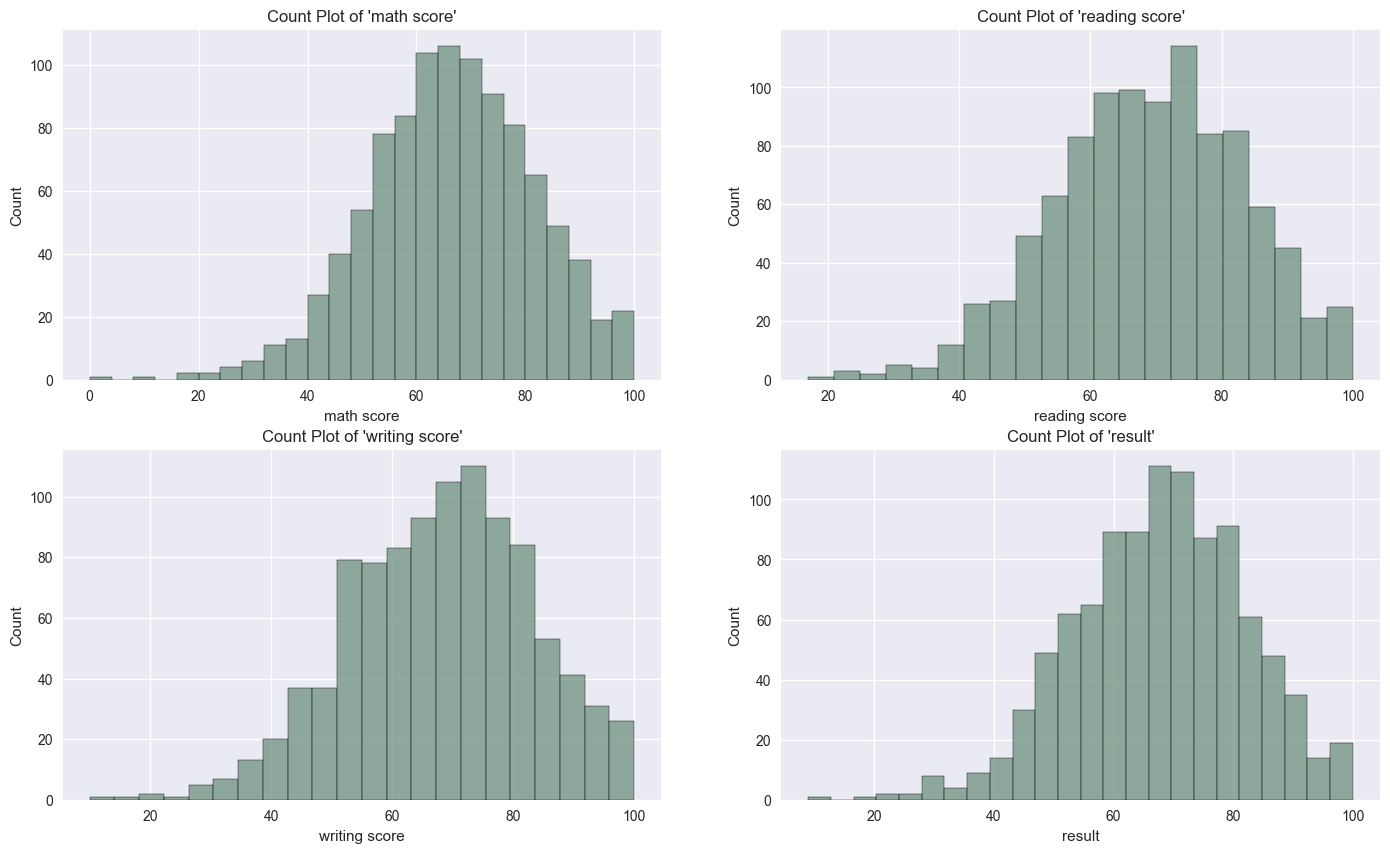

<IPython.core.display.Javascript object>

In [15]:
n_rows, n_cols = 2, 2
figsize = (17, 10)
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
for idx, feat in enumerate(num_data.columns):
    if n_rows > 1:
        ax = axs[(idx // n_cols), (idx % n_cols)]
    else:
        ax = axs[idx]
    sns.histplot(data=num_data, x=feat, ax=ax, color="#6e917f")
    ax.set_title(f"Count Plot of {feat!r}")

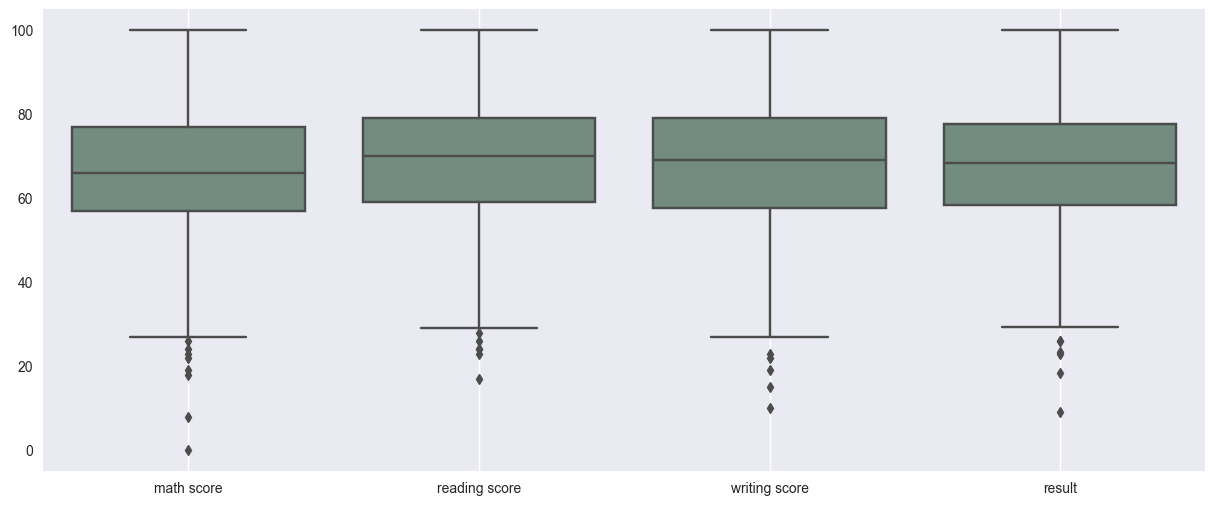

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=[15, 6])
sns.boxplot(data=num_data, color="#6e917f")
plt.grid()
plt.show()

#### from the above charts, there is outliers for each of the subject, so we will descretize the variables in order to handle this

In [17]:
# decretizing the score

score_list = ["math score", "reading score", "writing score", "result"]
for i in score_list:
    condition = [
        (num_data[i] >= 70),
        (num_data[i] >= 60),
        (num_data[i] >= 50),
        (num_data[i] >= 45),
        (num_data[i] < 45),
    ]
    choicelist = ["A", "B", "C", "D", "E"]

    # extracting the subject name
    pat = r"\w+"
    subject = re.search(pattern=pat, string=i).group()

    # mapping the rows
    num_data[f"{subject} grade"] = np.select(condlist=condition, choicelist=choicelist)

<IPython.core.display.Javascript object>

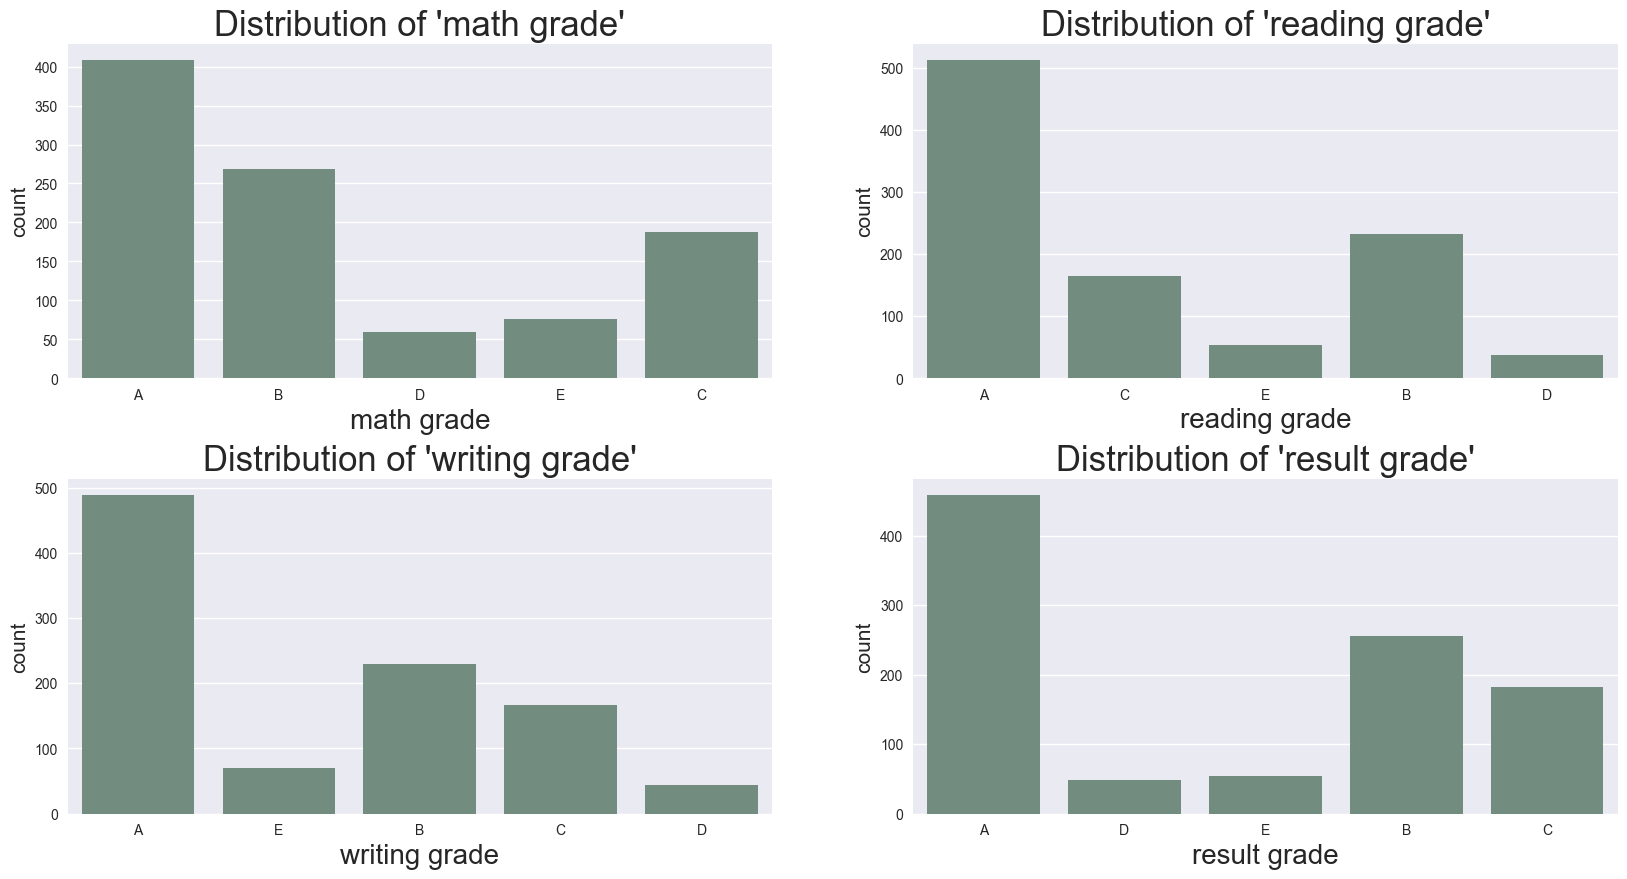

<IPython.core.display.Javascript object>

In [18]:
data = ["math grade", "reading grade", "writing grade", "result grade"]
count_plot(
    df=num_data,
    columns=data,
    ncols=2,
    nrows=2,
    # hspace=,
    xlabel_size=20,
    figsize=(20, 10),
    title_size=25,
    x_labelsize=14,
)

this is the result after descritization

#### Categorical data

In [19]:
cat_data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none


<IPython.core.display.Javascript object>

In [20]:
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_1536\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<IPython.core.display.Javascript object>

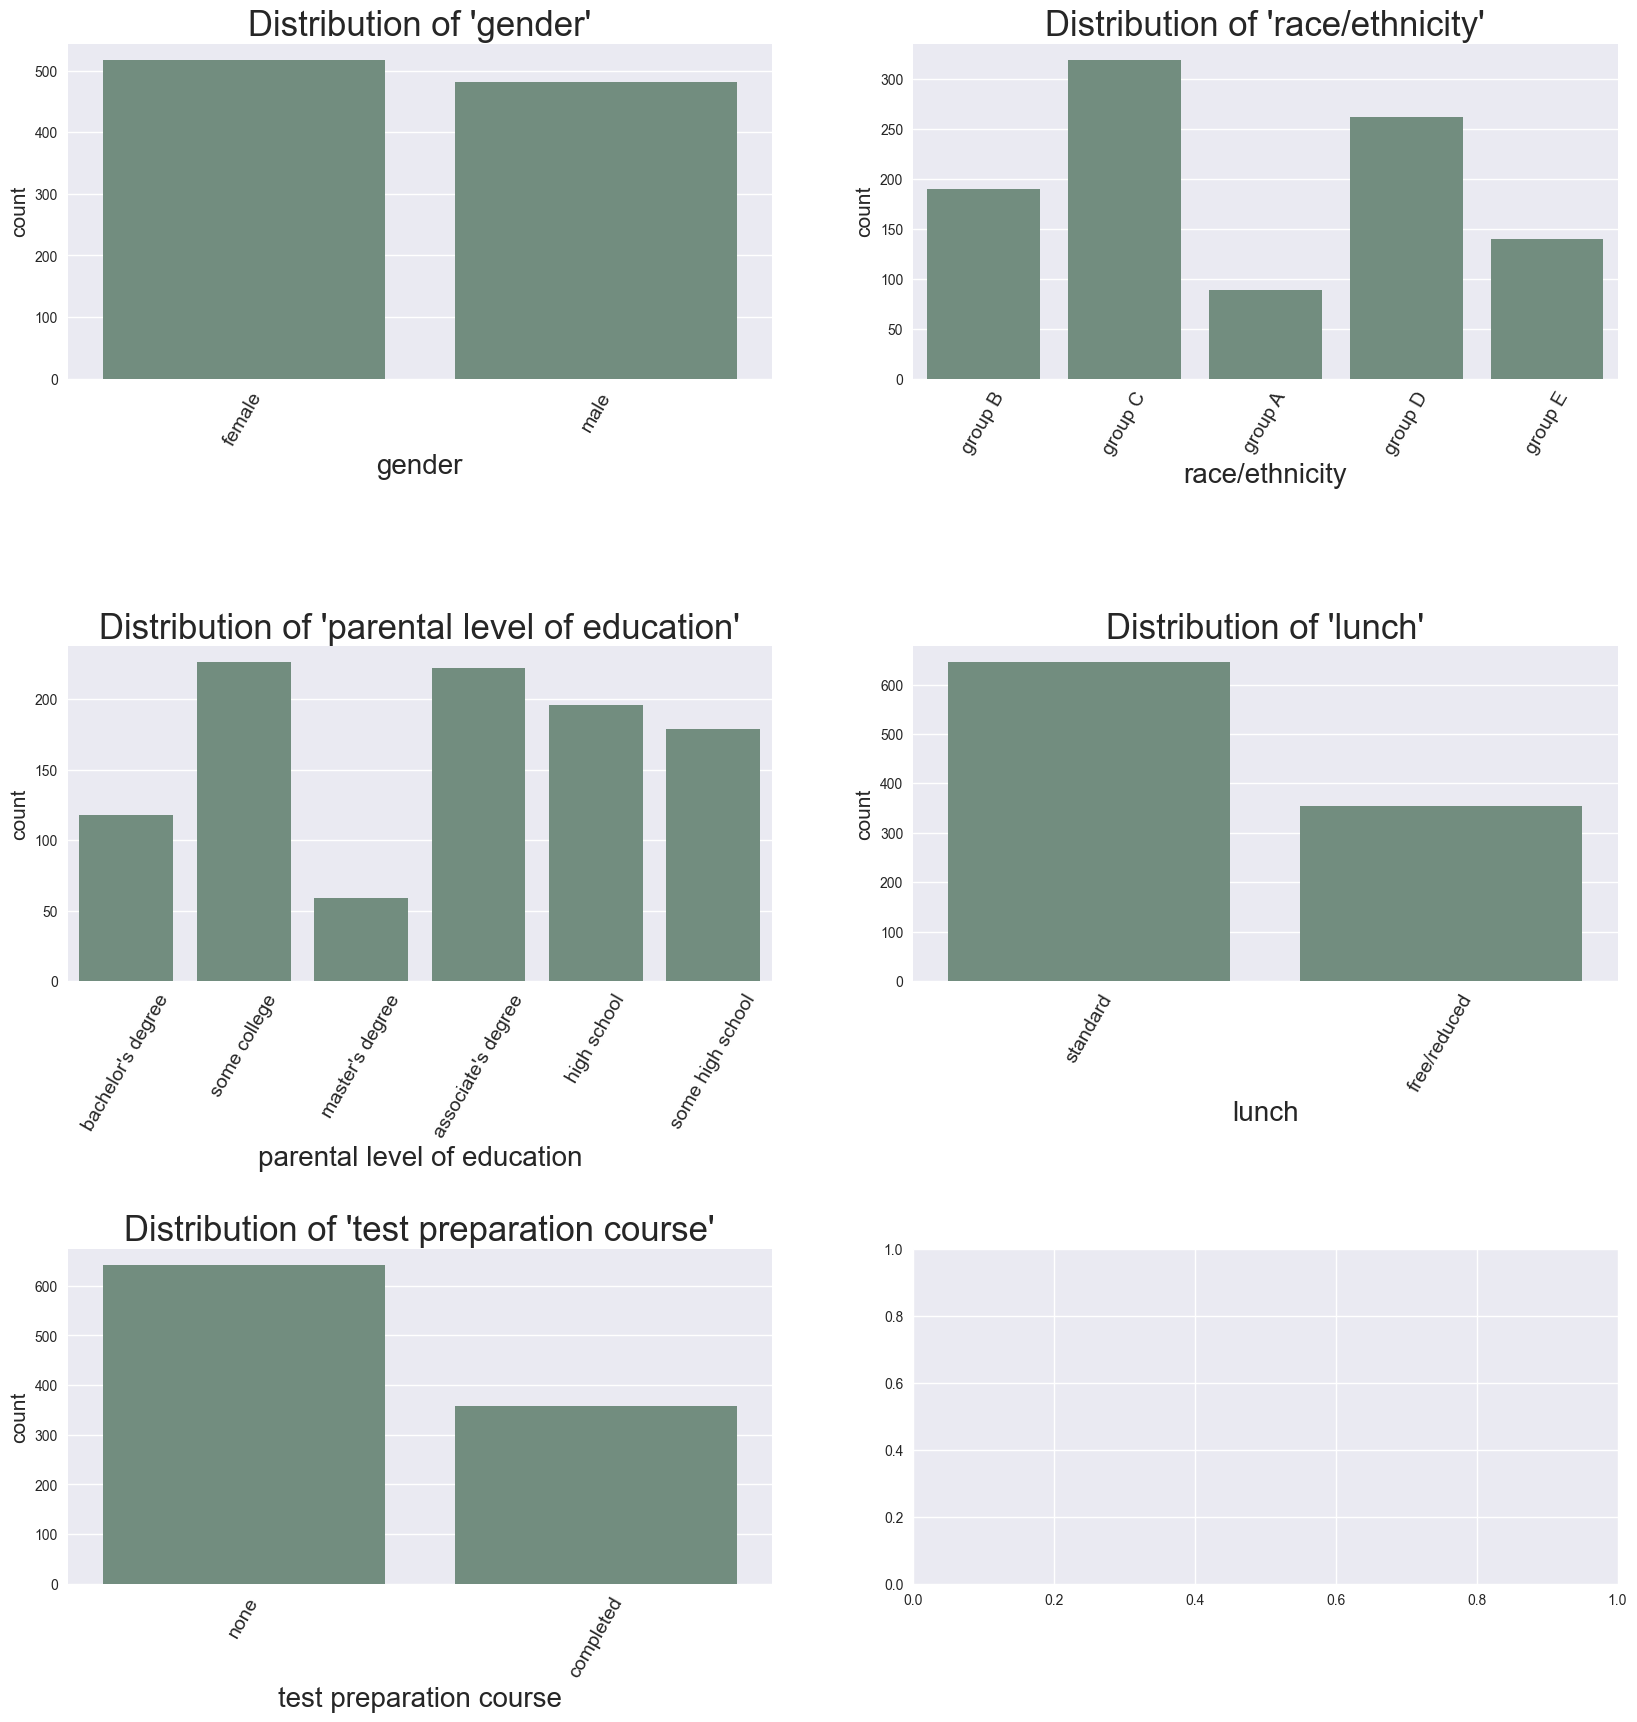

<IPython.core.display.Javascript object>

In [21]:
data = ["math grade", "reading grade", "writing grade", "result grade"]
count_plot(
    df=cat_data,
    columns=cat_data.columns,
    ncols=2,
    nrows=3,
    hspace=0.8,
    rotation=60,
    xlabel_size=20,
    figsize=(20, 20),
    title_size=25,
    x_labelsize=14,
)

#### No rare values for these variables

In [22]:
# combining the data for more exploration

combined = pd.concat([num_data, cat_data], axis=1)
print(combined.shape)
combined.head()

(1000, 13)


,math score,reading score,writing score,result,math grade,reading grade,writing grade,result grade,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,72,72,74,72.67,A,A,A,A,female,group B,bachelor's degree,standard,none
1,69,90,88,82.33,B,A,A,A,female,group C,some college,standard,completed
2,90,95,93,92.67,A,A,A,A,female,group B,master's degree,standard,none
3,47,57,44,49.33,D,C,E,D,male,group A,associate's degree,free/reduced,none
4,76,78,75,76.33,A,A,A,A,male,group C,some college,standard,none


<IPython.core.display.Javascript object>

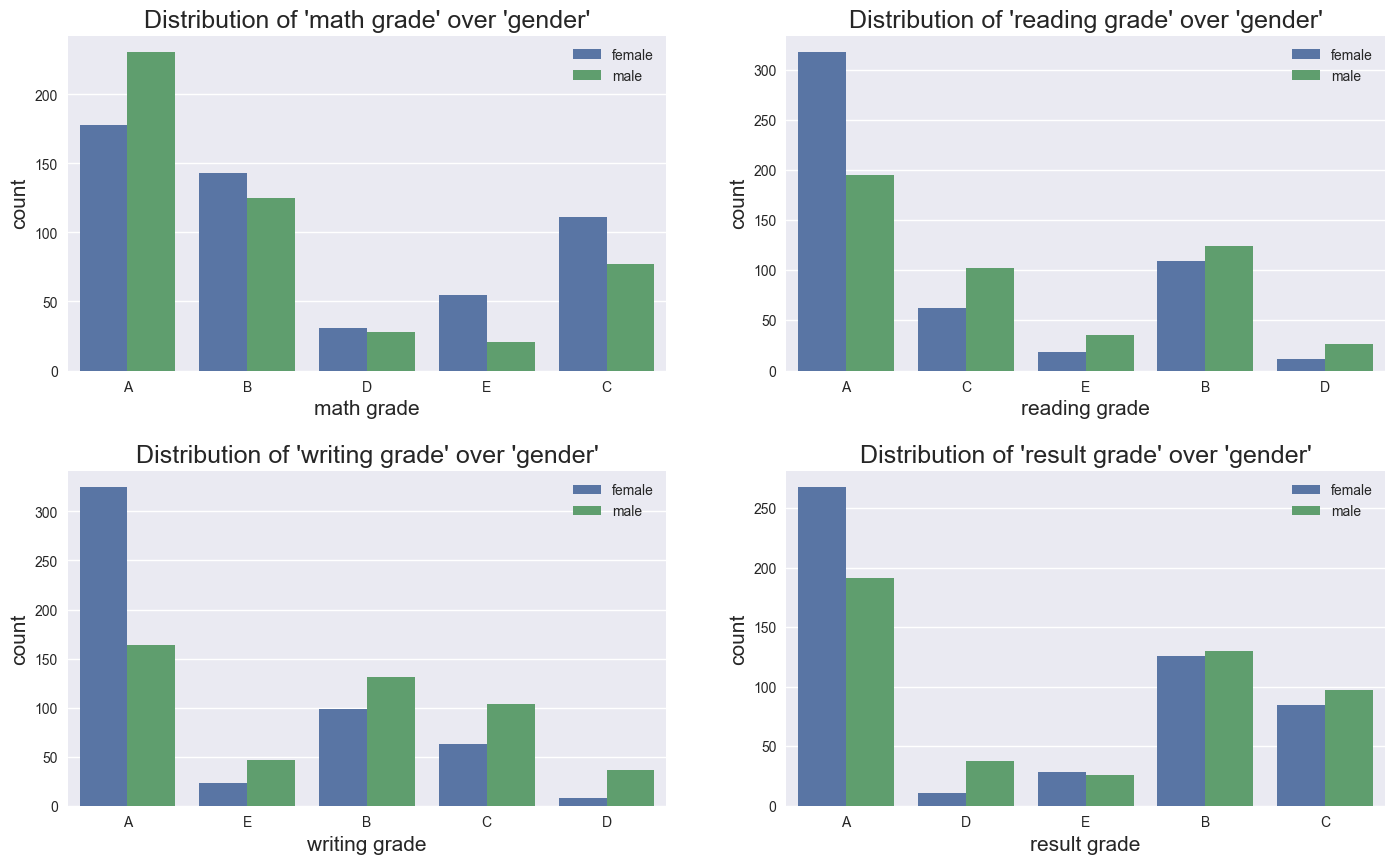

<IPython.core.display.Javascript object>

In [23]:
data = ["math grade", "reading grade", "writing grade", "result grade"]
count_plot(df=combined, columns=data, ncols=2, nrows=2, hue="gender", title_size=18)

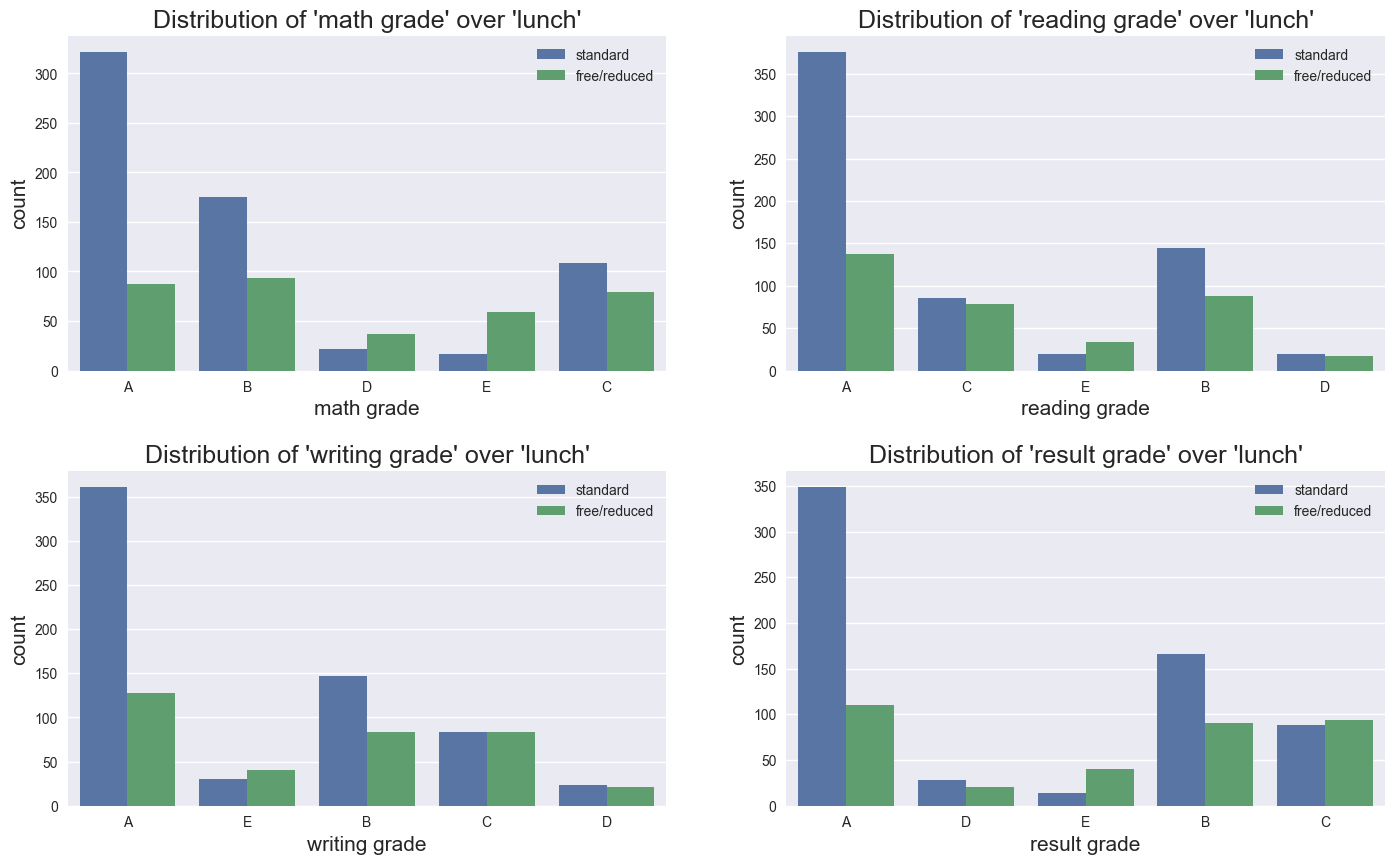

<IPython.core.display.Javascript object>

In [24]:
count_plot(df=combined, ncols=2, nrows=2, columns=data, hue="lunch", title_size=18)

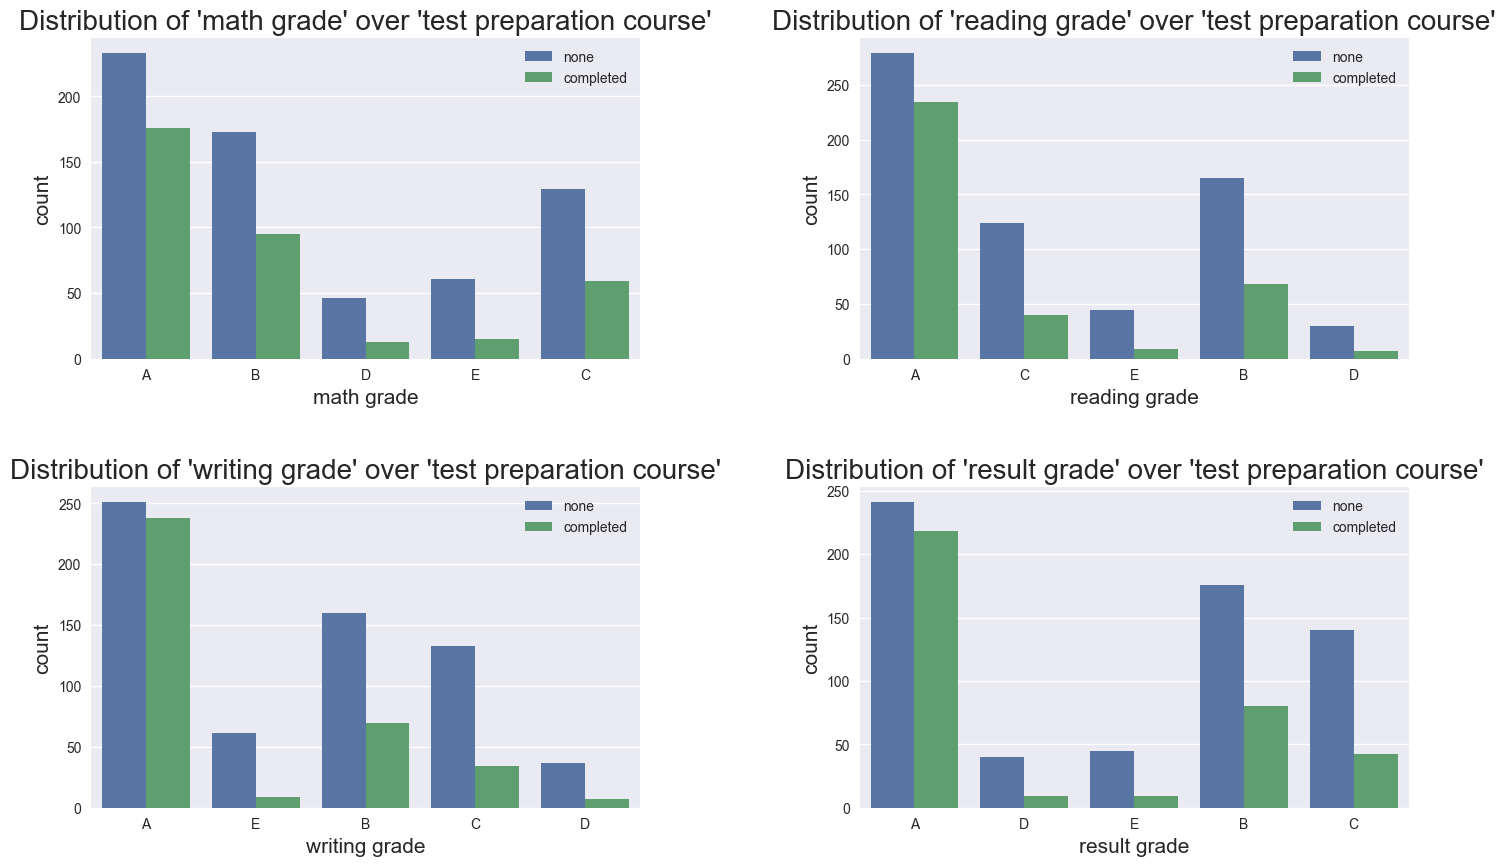

<IPython.core.display.Javascript object>

In [25]:
count_plot(
    df=combined,
    ncols=2,
    nrows=2,
    columns=data,
    hue="test preparation course",
    wspace=0.4,
    hspace=0.4,
    title_size=20,
)

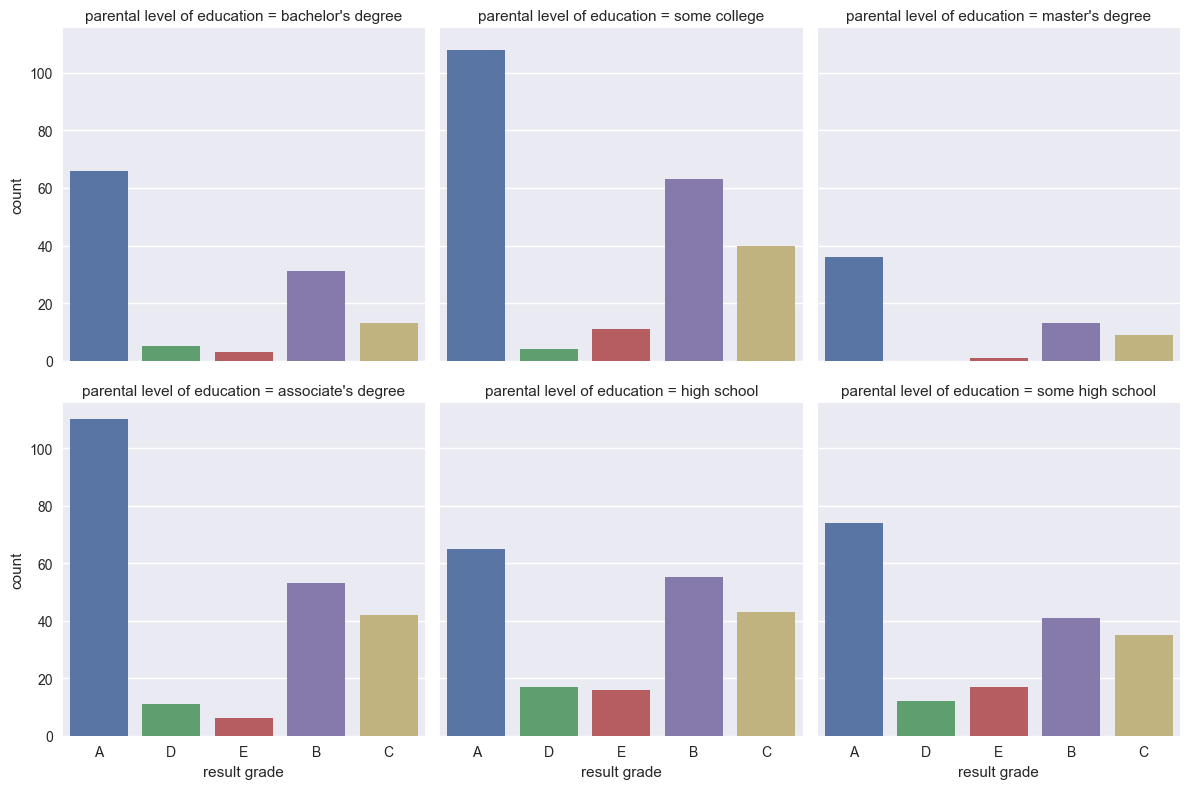

<IPython.core.display.Javascript object>

In [26]:
sns.catplot(
    data=combined,
    col="parental level of education",
    x="result grade",
    kind="count",
    height=4,
    aspect=1,
    col_wrap=3,
    margin_titles=True,
)
plt.show()

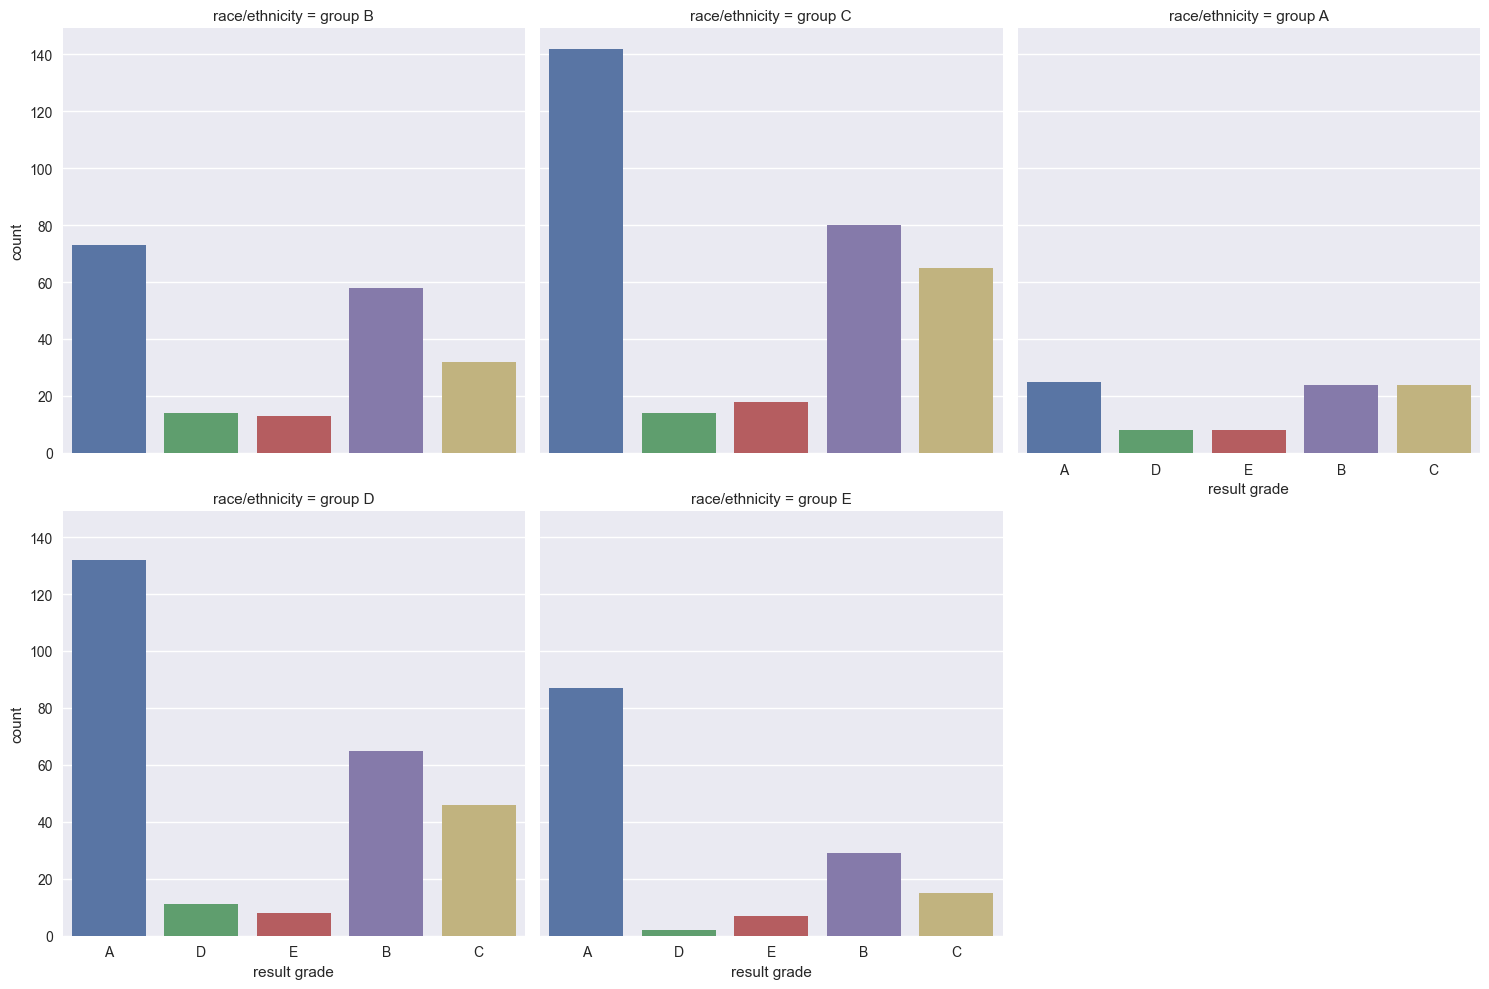

<IPython.core.display.Javascript object>

In [27]:
sns.catplot(
    data=combined,
    col="race/ethnicity",
    x="result grade",
    kind="count",
    height=5,
    aspect=1,
    col_wrap=3,
    margin_titles=True,
)
plt.show()

In [28]:
fail = combined[combined["result grade"] == "E"]
(fail.shape[0] / combined.shape[0]) * 100

5.4

<IPython.core.display.Javascript object>

In [29]:
upper = combined[combined["result grade"].isin(["A", "B"])]
(upper.shape[0] / combined.shape[0]) * 100

71.5

<IPython.core.display.Javascript object>

# INSIGHT

* The average score for math, reading and writing is 66, 69, and 68 respectively, which is grade B 
* There are students that scored zero in mathematics 
* Only 5.4 percent of student failed,they scored less than 45 
* 71.5 percent of student got 60 and above
* The highest number of student that got A are female except for mathematics, this shows that men are good in calculating
* The highest number of student that scored 60 and above are those that took standard lunch
* The number of student that scored highest for all the grade, for all the subject are those that did not take the test course preparation, this shows that the test preparation course is not helping, even if you did not take it you will still pass
* The highest number of student that scored 60 and above are children whose parent have middle level of education(Associate degree and some collage)
 
